In [82]:
import numpy as np

from sklearn import datasets
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

import math

import matplotlib.pyplot as plt

from scipy.spatial import distance

mbyte = 1048576
norm_l1 = Normalizer(norm='l1')
norm_l2 = Normalizer(norm='l2')

# Set your dataset path

In [2]:
path = '' # /home/username/datasets/

# Tools

In [102]:
from hashlib import md5

def find_nearest_neighbor(P, q):
    dis = np.array([distance.euclidean(p, q) for p in P])
    return np.argsort(dis)[0]

def fvecs_read(filename, c_contiguous=True):
    fv = np.fromfile(filename, dtype=np.float32)
    if fv.size == 0:
        return np.zeros((0, 0))
    dim = fv.view(np.int32)[0]
    assert dim > 0
    fv = fv.reshape(-1, 1 + dim)
    if not all(fv.view(np.int32)[:, 0] == dim):
        raise IOError("Non-uniform vector sizes in " + filename)
    fv = fv[:, 1:]
    if c_contiguous:
        fv = fv.copy()
    return fv


def store_dataset(title, train, test, K, distance_function):
    data = dict()
    data['title'] = title
    data['train'] = train
    data['test'] = test
    data['K'] = K
    data['n_train'] = train.shape[0]
    data['n_test'] = test.shape[0]
    
    k_near_neighbors = []
    nearest_neighbor = []

    for i, q in enumerate(test):
        d = np.array([distance_function(q, p) for p in train])
        order_d = d.argsort()
        
        k_near_neighbors.append(order_d[:K])
        nearest_neighbor.append(order_d[0])
        
    data['k_near_neighbors'] = k_near_neighbors
    data['nearest_neighbor'] = nearest_neighbor
    
    return data

# Datasets Arguments

In [103]:
Datasets = dict()

# SIFT
[website](http://corpus-texmex.irisa.fr/)

## 10K
[download](ftp://ftp.irisa.fr/local/texmex/corpus/siftsmall.tar.gz)

In [104]:
train = fvecs_read(path + 'sift/sifts-10K/sift_base.fvecs').astype(np.int)
test = fvecs_read(path + 'sift/sifts-10K/sift_query.fvecs').astype(np.int)

In [105]:
q = test_sift[0]

CPU times: user 197 ms, sys: 9.96 ms, total: 207 ms
Wall time: 208 ms


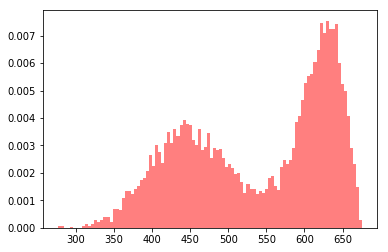

In [106]:
%%time
d2 = np.array([distance.euclidean(q, p) for p in train_sift])
plt.hist(d2, bins=100, color='r', alpha=0.5, density=True)

In [107]:
%%time
sift = store_dataset(title='SIFT-10K', train=train, test=test, K=50, 
                     distance_function=distance.euclidean)

CPU times: user 12.2 s, sys: 6.5 ms, total: 12.2 s
Wall time: 12.2 s


In [108]:
Datasets['SIFT-10K'] = sift

# MNIST

In [110]:
mnist = datasets.fetch_mldata('mnist-original')['data']

## Hamming

In [111]:
mnist_hamming = mnist.copy()

In [112]:
mnist_hamming[mnist_hamming > 0] = 1

In [113]:
train, test = train_test_split(mnist_hamming, test_size=500, random_state=1)
train.shape, test.shape

((69500, 784), (500, 784))

In [115]:
data_mnist_hamming = store_dataset(title='MNIST-Hamming', train=train, test=test, K=100, 
                                   distance_function=distance.hamming)

In [116]:
Datasets['MNIST-Hamming'] = data_mnist_hamming

# Store Dataset

In [117]:
# 最近邻数据
%store Datasets

Stored 'Datasets' (dict)


**Read data in other notebook.**

In [14]:
# %store -r Datasets